In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


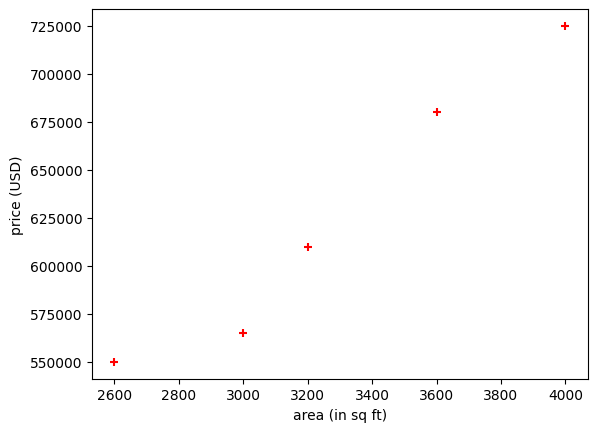

In [3]:
plt.xlabel('area (in sq ft)')
plt.ylabel('price (USD)')

plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.show()

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [5]:
reg.predict(np.array([[3300]]))

/home/m1069009/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

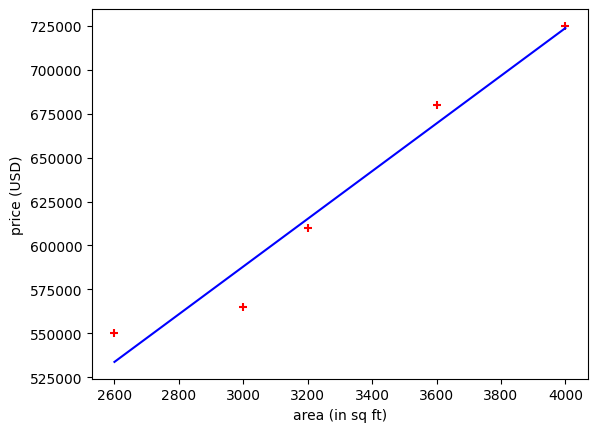

In [6]:
plt.xlabel('area (in sq ft)')
plt.ylabel('price (USD)')

plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'Blue' )
plt.show()

In [7]:
df_canada  = pd.read_csv('canada_per_capita_income.csv')
df_canada.tail(3)

,year,per capita income (US$)
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [8]:
# reg.fit(df[['area']], df.price)
reg.fit(df_canada[['year']], df_canada['per capita income (US$)'])
reg.predict(np.array([[2020]]))

/home/m1069009/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [9]:
hp = pd.read_csv('hiring.csv')

In [10]:
hp

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [11]:
hp = hp.fillna(0)

In [12]:
hp


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,0.0,7,72000
7,eleven,7.0,8,80000


In [13]:
from word2number import w2n

In [14]:
# hp_c = w2n.word_to_num(hp['experience'])
hp['experience_numeric'] = hp['experience'].apply(lambda x: w2n.word_to_num(str(x)))
hp

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience_numeric
0,0,8.0,9,50000,0
1,0,8.0,6,45000,0
2,five,6.0,7,60000,5
3,two,10.0,10,65000,2
4,seven,9.0,6,70000,7
5,three,7.0,10,62000,3
6,ten,0.0,7,72000,10
7,eleven,7.0,8,80000,11


In [15]:
hp.drop('experience', axis=1, inplace=True)

In [16]:
hp

,test_score(out of 10),interview_score(out of 10),salary($),experience_numeric
0,8.0,9,50000,0
1,8.0,6,45000,0
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,0.0,7,72000,10
7,7.0,8,80000,11


In [17]:
print(hp.columns)

Index(['test_score(out of 10)', 'interview_score(out of 10)', 'salary($)',
       'experience_numeric'],
      dtype='object')


In [20]:
desired_order = ['test_score(out of 10)', 'interview_score(out of 10)', 'experience_numeric', 'salary($)']
df_reordered = hp[desired_order]
df_reordered

,test_score(out of 10),interview_score(out of 10),experience_numeric,salary($)
0,8.0,9,0,50000
1,8.0,6,0,45000
2,6.0,7,5,60000
3,10.0,10,2,65000
4,9.0,6,7,70000
5,7.0,10,3,62000
6,0.0,7,10,72000
7,7.0,8,11,80000


In [21]:
hp.rename(columns = {'experience_numeric':'experience'}, inplace = True)
df = hp

In [22]:
# Check for leading/trailing whitespaces and remove them
df.columns = df.columns.str.strip()

# Now try the replacement again
mean_value = df['test_score(out of 10)'].mean()
df['test_score(out of 10)'] = df['test_score(out of 10)'].replace(0, mean_value)
df

,test_score(out of 10),interview_score(out of 10),salary($),experience
0,8.000,9,50000,0
1,8.000,6,45000,0
2,6.000,7,60000,5
3,10.000,10,65000,2
4,9.000,6,70000,7
5,7.000,10,62000,3
6,6.875,7,72000,10
7,7.000,8,80000,11


In [23]:
reg = linear_model.LinearRegression()
reg.fit(hp[['test_score(out of 10)','interview_score(out of 10)','experience']], hp['salary($)'])

LinearRegression()

In [26]:
reg.predict([[2,9,6]])

/home/m1069009/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56181.33552528])